In [1]:
#Import the corresponding libraries
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [2]:
#Read the Excel file
'''
Each of the files for this project contains 2 tabs. For instance:
The file completo800_(edit).xlsx contains the tabs:

* totale
* Foglio 1

This is the Time Series Data of a single patient  ---> to be confirmed 

''' 
#Using the following command we'll have a dictionary in which each element is a tab of the original .xlsx file
df = pd.read_excel("/Users/luisescobar/Documents/Thesis/DataSets/1007_casi_Prismaflex_Preliminar/completo800_(edit).xlsx"
                   , sheet_name=None)

In [3]:
#df is a dictionary with len 2 corresponding to each tab of the initial .xlsx file
print(f"df is a {type(df)}")
print(f"The len of d is {len(df)}")

df is a <class 'dict'>
The len of d is 2


In [4]:
#Keys of the dictionary which correspond to the names of the tabs
list(df.keys())

['totale', 'Foglio 1']

In [5]:
#Save each key (tab) in a different DataFrame
totale_df = df['totale']
Foglio1_df = df['Foglio 1']

In [6]:
#totale is information related to the patient
totale_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 311232 entries, 0 to 311231
Data columns (total 94 columns):
 #   Column                            Non-Null Count   Dtype         
---  ------                            --------------   -----         
 0   Patient                           0 non-null       float64       
 1   Date__Heure                       311232 non-null  datetime64[ns]
 2   P_Access                          311232 non-null  int64         
 3   P_Filter                          311232 non-null  int64         
 4   P_Effluent                        311232 non-null  int64         
 5   P_Return                          311232 non-null  int64         
 6   FIFTH_PRESSURE                    311232 non-null  int64         
 7   RUN_TIME                          311232 non-null  int64         
 8   Post_Replacement                  311232 non-null  int64         
 9   Pre_Replacement                   311232 non-null  int64         
 10  Dialysate                       

In [7]:
totale_df.head()

,Patient,Date__Heure,P_Access,P_Filter,P_Effluent,P_Return,FIFTH_PRESSURE,RUN_TIME,Post_Replacement,Pre_Replacement,...,Citric_Acid_Concentration__mmol_,Citrate_Dose__mmol_L_,Calcium_Compensation____,Calcium_syringe_Concentration__m,Treatment_Duration__h_,effluent2,delta_eff,max_line,reverse,sum
0,NaN,2012-05-12 21:41:00,-9,60,21,23,-10,78951,12731,0,...,_,_,_,_,19.098612,49518,-40,2608,1156,-41843
1,NaN,2012-05-12 21:42:00,-14,88,24,32,-10,79011,12741,0,...,_,_,_,_,19.098612,49557,-39,2608,1155,-41803
2,NaN,2012-05-12 21:43:00,-16,125,66,61,-9,79071,12751,0,...,_,_,_,_,19.098612,49595,-38,2608,1154,-41764
3,NaN,2012-05-12 21:44:00,-13,123,66,63,-9,79131,12762,0,...,_,_,_,_,19.098612,49634,-39,2608,1153,-41726
4,NaN,2012-05-12 21:45:00,-15,117,58,58,-9,79191,12771,0,...,_,_,_,_,19.098612,49673,-39,2608,1152,-41687


In [8]:
#Show values of specific columns
totale_df[["Dialysate","Effluent","Patient_weight__Kg_"]].tail()

,Dialysate,Effluent,Patient_weight__Kg_
311227,966793,1138839,110.0
311228,966849,1138906,110.0
311229,966907,1138973,110.0
311230,966963,1139040,110.0
311231,967019,1139107,110.0


In [9]:
#Show values of specific columns using iloc
initial = 10 #included
final = 21 #not included
totale_df.iloc[:, initial:final].head()

,Dialysate,Effluent,Pre_Blood_Pump,SYRINGE_INF,EXCESS_PT_FLUID,PUMP_PBP,PUMP_Rep,PUMP_Dial,PUMP_Eff,Q_Blood_Pump,Q_Replacement
0,25429,49478,9186,0,-4,7.04,10.87,21.58,42.91,140,600
1,25450,49518,9193,0,-4,6.98,11.34,22.34,40.31,140,600
2,25469,49557,9199,0,-4,7.70,11.04,22.53,39.37,140,600
3,25490,49595,9207,0,-2,7.43,10.53,22.31,38.28,140,600
4,25511,49634,9215,0,-2,6.82,10.47,21.55,38.73,140,600


In [10]:
Foglio1_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 308783 entries, 0 to 308782
Data columns (total 12 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   line                     308783 non-null  int64  
 1   Q_Blood_Pump             308783 non-null  int64  
 2   Q_Replacement            308783 non-null  int64  
 3   Q_Dialysate              308783 non-null  int64  
 4   Q_PBP                    308783 non-null  int64  
 5   Q_Patient_Fluid_Removal  308783 non-null  int64  
 6   trt                      308783 non-null  int64  
 7   Set                      308783 non-null  float64
 8   coeff_blu                308707 non-null  float64
 9   coef_verde               308709 non-null  float64
 10  coef_conv                308783 non-null  int64  
 11  coef_dial                308783 non-null  int64  
dtypes: float64(3), int64(9)
memory usage: 28.3 MB


In [11]:
Foglio1_df.head()

,line,Q_Blood_Pump,Q_Replacement,Q_Dialysate,Q_PBP,Q_Patient_Fluid_Removal,trt,Set,coeff_blu,coef_verde,coef_conv,coef_dial
0,1452,140,600,1200,400,100,601,1.5,7.215007e-08,0.095238,1100,1200
1,1453,140,600,1200,400,100,601,1.5,7.215007e-08,0.095238,1100,1200
2,1454,140,600,1200,400,100,601,1.5,7.215007e-08,0.095238,1100,1200
3,1455,140,600,1200,400,100,601,1.5,7.215007e-08,0.095238,1100,1200
4,1456,140,600,1200,400,100,601,1.5,7.215007e-08,0.095238,1100,1200


Google sheet with a brief explanation of the different variables https://docs.google.com/spreadsheets/d/102f3E3RJLifS9wKVTkt6O5d5IzRvxsy5WOlyZjh9ftk/edit?usp=sharing

# Exploratory Data Analysis

A research question up to this part could be.

* Do the other DataSets have the same format/variables/parameters?

Yes, since each dataset seems to be data from a specific patient

In [12]:
#Create a sub Data Frame from the original one. We'll consider TMP and TMPa, as index we'll set the Date__Heure
df_time = totale_df[["Date__Heure","TMP","TMPa"]].set_index("Date__Heure")
df_time.sort_index(inplace=True)
df_time.head()

,TMP,TMPa
Date__Heure,,
2009-10-27 16:21:00,-6.5,-8
2009-10-27 16:22:00,111.5,116
2009-10-27 16:23:00,90.5,95
2009-10-27 16:24:00,78.5,83
2009-10-27 16:25:00,76.0,80


In [13]:
df_time.tail()

,TMP,TMPa
Date__Heure,,
2013-11-30 07:56:00,58.5,81
2013-11-30 07:57:00,59.0,83
2013-11-30 07:58:00,57.0,82
2013-11-30 07:59:00,55.5,80
2013-11-30 08:00:00,56.0,80


In [14]:
#Print Data Frame info to identify the existence of null values
df_time.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 311232 entries, 2009-10-27 16:21:00 to 2013-11-30 08:00:00
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   TMP     311232 non-null  float64
 1   TMPa    311232 non-null  int64  
dtypes: float64(1), int64(1)
memory usage: 7.1 MB


In [15]:
#Description of the sub Data Frame
df_time.describe()

,TMP,TMPa
count,311232.000000,311232.000000
mean,67.853198,89.315604
std,72.838690,77.730204
min,-459.500000,-518.000000
25%,17.000000,41.000000
50%,51.000000,72.000000
75%,87.500000,105.000000
max,810.000000,870.000000


<Axes: title={'center': 'Distribution of TMP Readings'}>

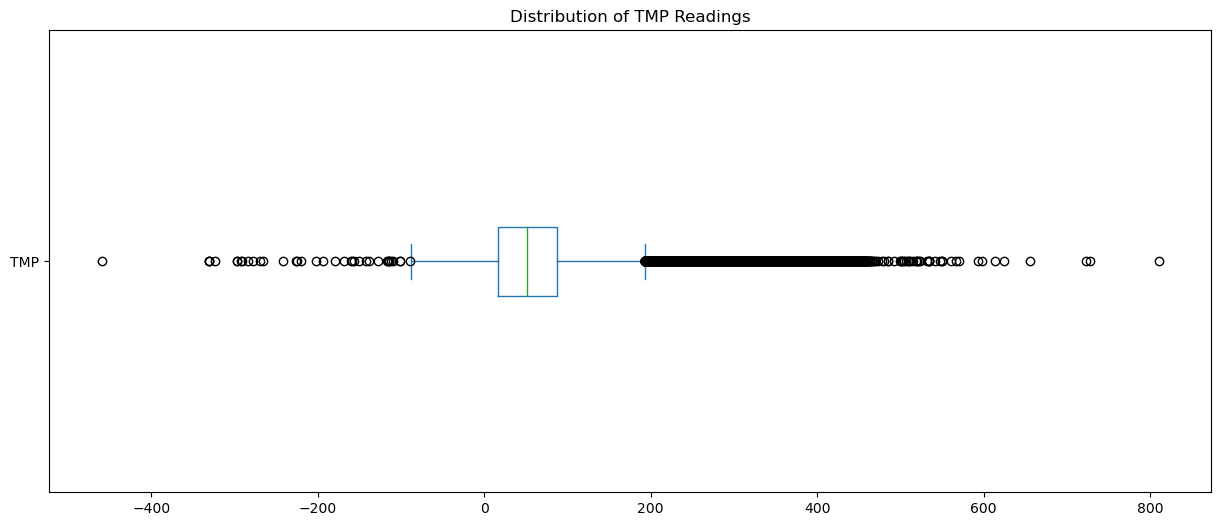

In [16]:
#BoxPlot for variable TMP
fig, ax = plt.subplots(figsize=(15, 6))
df_time["TMP"].plot(kind="box", vert=False, title="Distribution of TMP Readings", ax=ax)

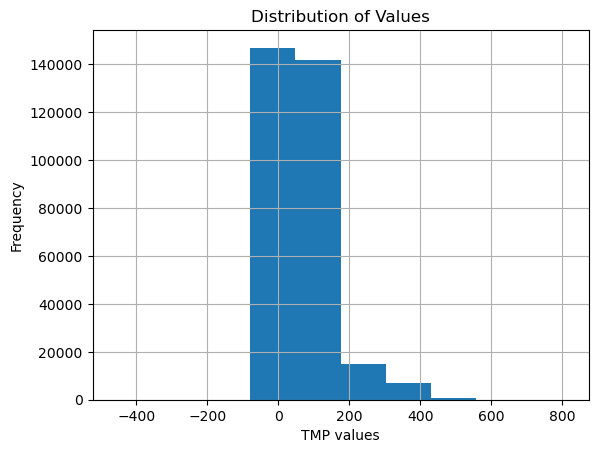

In [17]:
df_time["TMP"].hist()
plt.xlabel("TMP values")
plt.ylabel("Frequency")
plt.title("Distribution of Values");

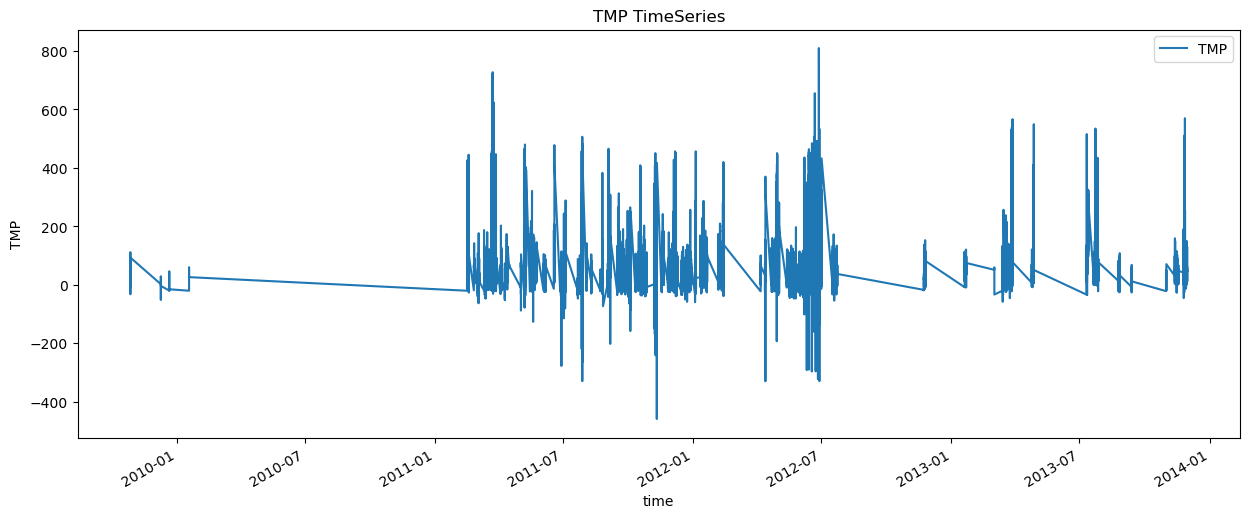

In [18]:
#Time Series plot for TMP
fig, ax = plt.subplots(figsize=(15, 6))
df_time_tmp = df_time["TMP"].to_frame()
df_time_tmp.plot(xlabel="time", ylabel="TMP", title="TMP TimeSeries", ax=ax);

### In which part of the graph should I focus?

<Axes: title={'center': 'Distribution of TMP Readings'}>

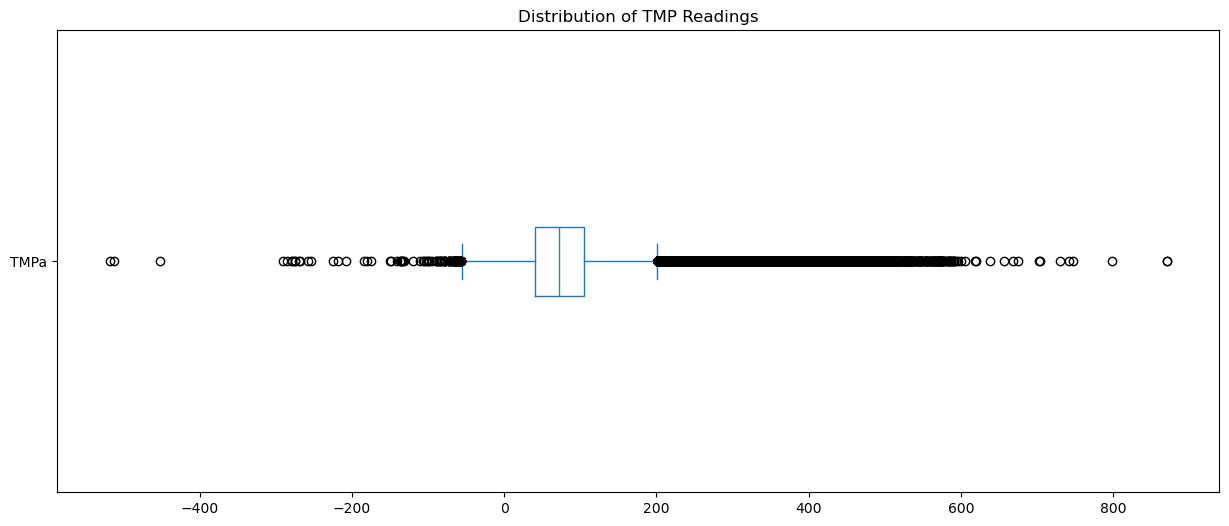

In [20]:
#BoxPlot for variable TMPa
fig, ax = plt.subplots(figsize=(15, 6))
df_time["TMPa"].plot(kind="box", vert=False, title="Distribution of TMP Readings", ax=ax)

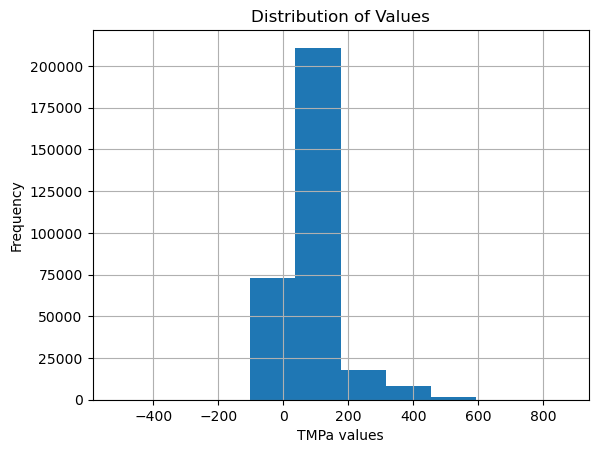

In [21]:
df_time["TMPa"].hist()
plt.xlabel("TMPa values")
plt.ylabel("Frequency")
plt.title("Distribution of Values");

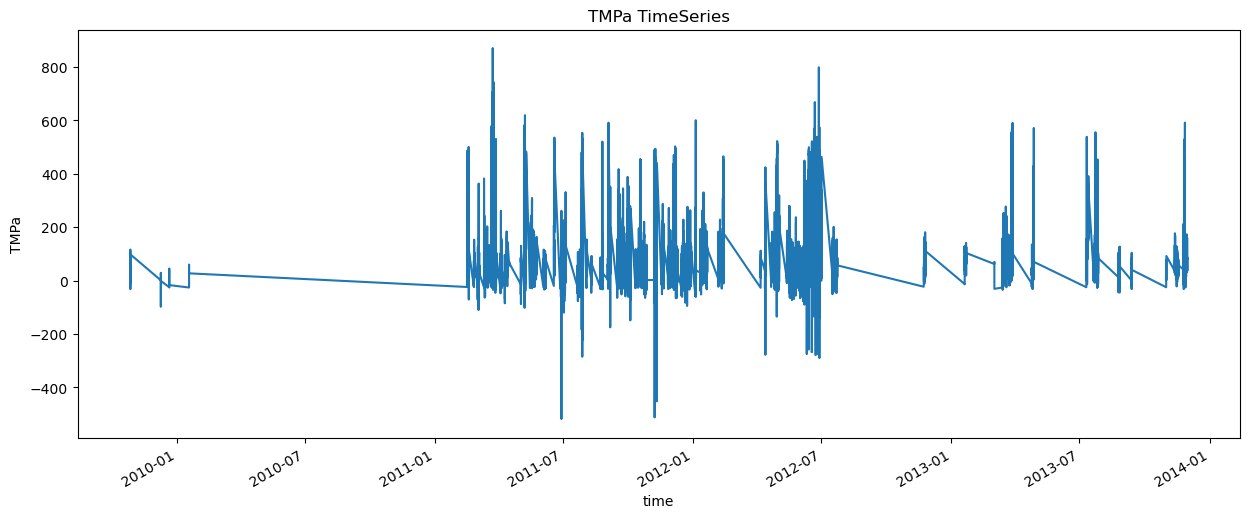

In [22]:
#Time Series plot for TMPa
fig, ax = plt.subplots(figsize=(15, 6))
df_time["TMPa"].plot(xlabel="time", ylabel="TMPa", title="TMPa TimeSeries", ax=ax);

<div class="alert alert-block alert-warning">
  <p>
    <b>To Do</b>
  </p>

  <p>
    I need to change in both plots the xlabel value. Is not consistent with the timestamp of the dataset 
  </p>
    
  <p>
  </p>
</div>

## Consider smaller periods of observations

In [33]:
def plot_ts_day(day, return_df=True):
    '''The function plots the observations of a single day 
    Parameters
    ----------
    day : str
        The day of interest i.e., '2012-05-12'
        
    return_df : bin
        Data Frame return. This value must be True/False
        
    Returns
    -------
    matplotlib.axes
        With observation of the specific day
    
    if return_df=True
    pd.DataFrame 
        With the values of the specific day
        Columns are 'TMP','TMPa'
        All are numeric
    '''
    df_day = df_time.loc[day]
    fig, ax = plt.subplots(figsize=(15, 6))
    df_day.plot(xlabel="time", title=f"TimeSeries {day}", ax=ax);
    if return_df:
        return df_day 

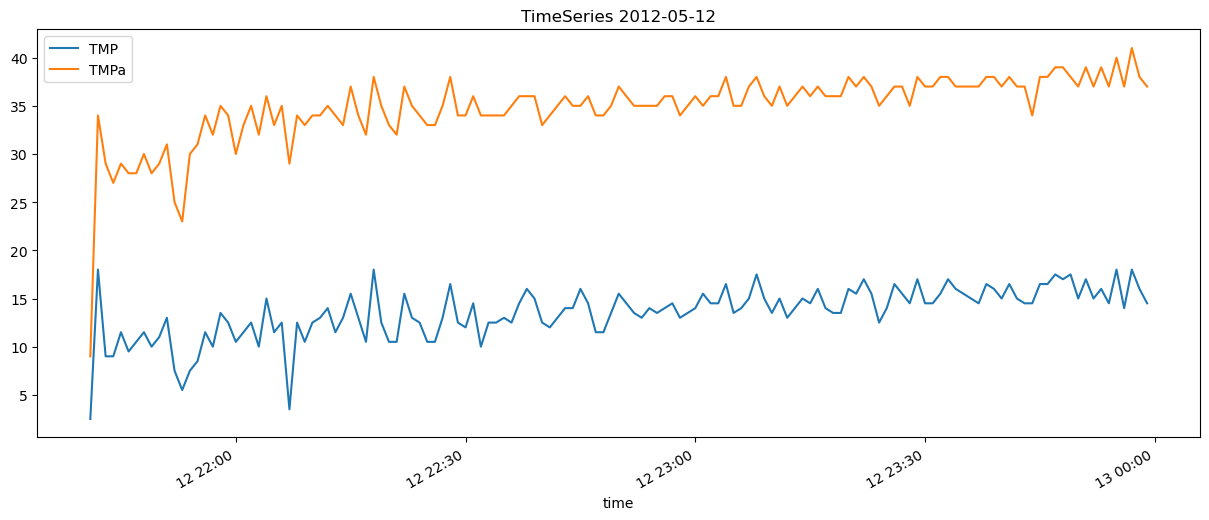

In [34]:
plot_ts_day('2012-05-12', return_df=False)

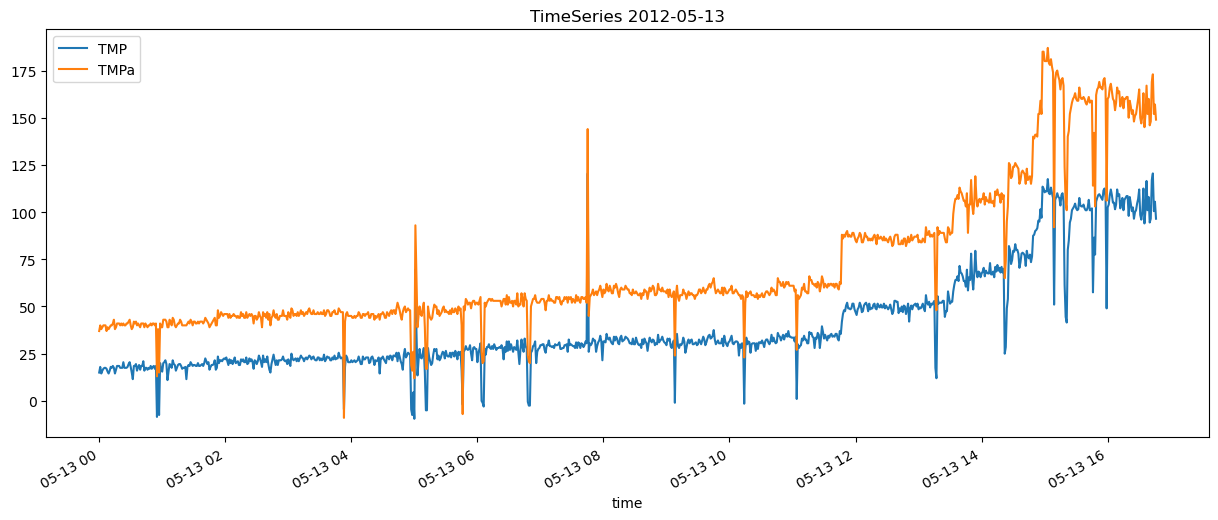

In [35]:
plot_ts_day('2012-05-13', return_df=False)

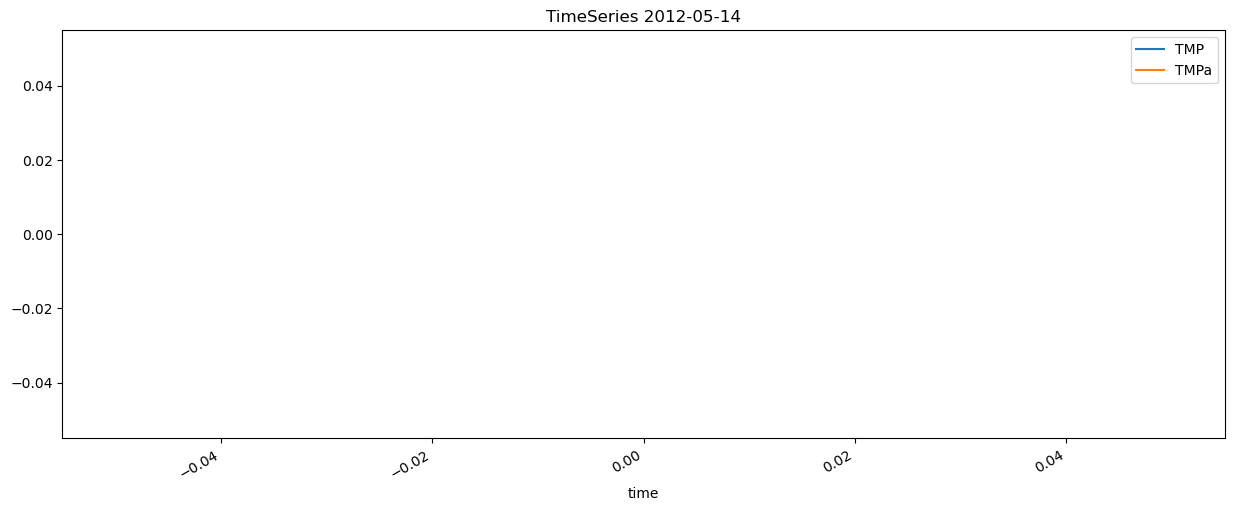

In [36]:
plot_ts_day('2012-05-14', return_df=False)

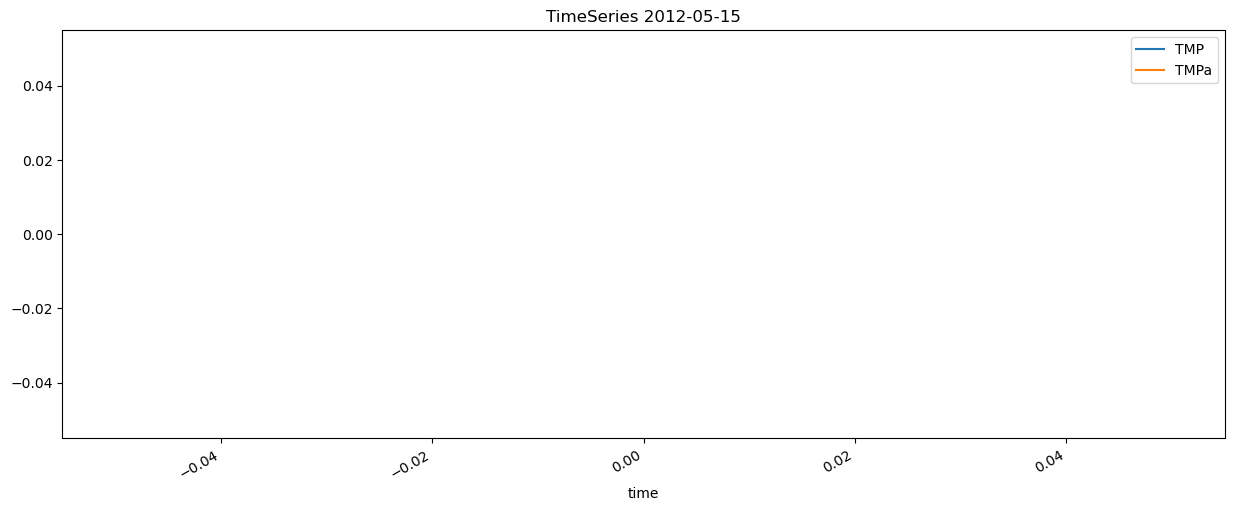

In [37]:
plot_ts_day('2012-05-15', return_df=False)

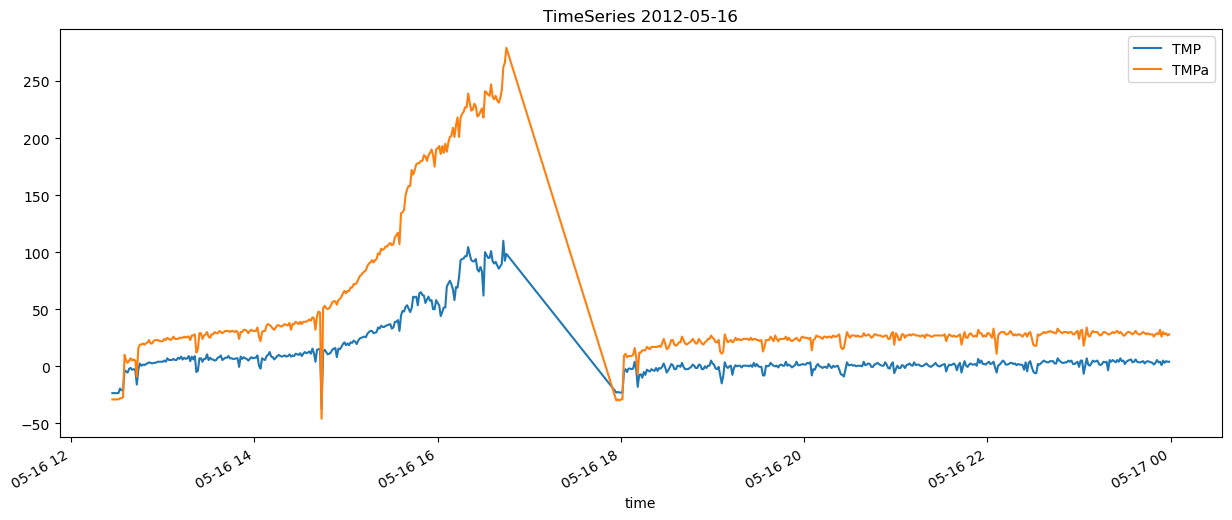

In [38]:
plot_ts_day('2012-05-16', return_df=False)

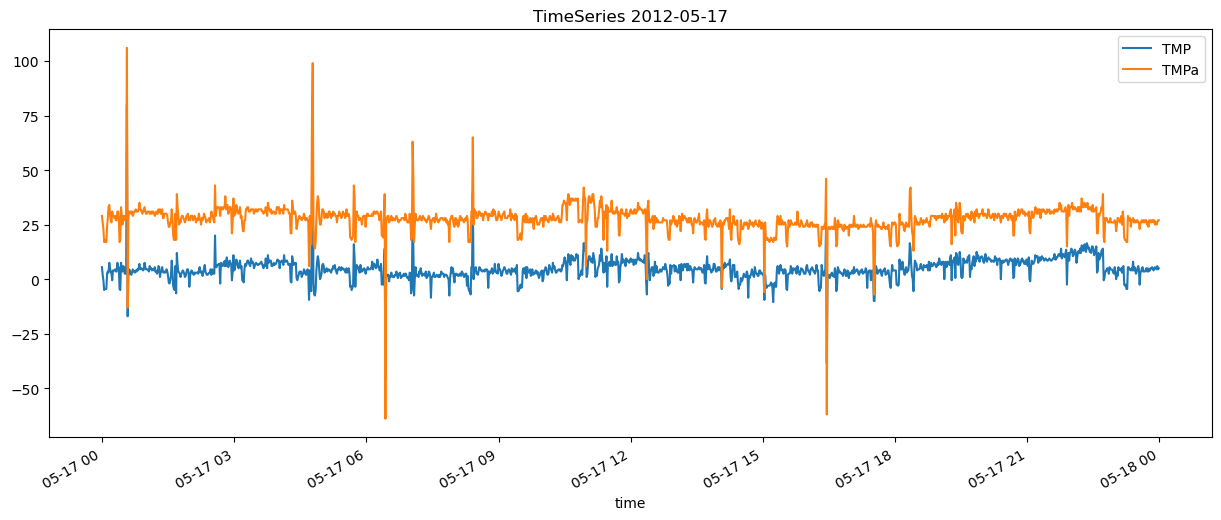

In [39]:
plot_ts_day('2012-05-17', return_df=False)

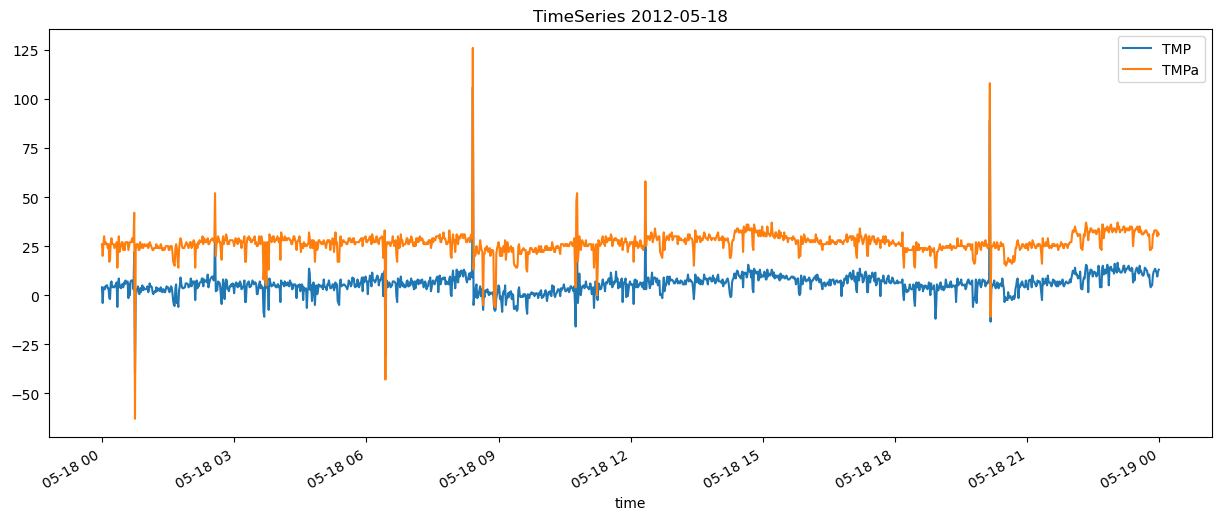

In [40]:
plot_ts_day('2012-05-18', return_df=False)

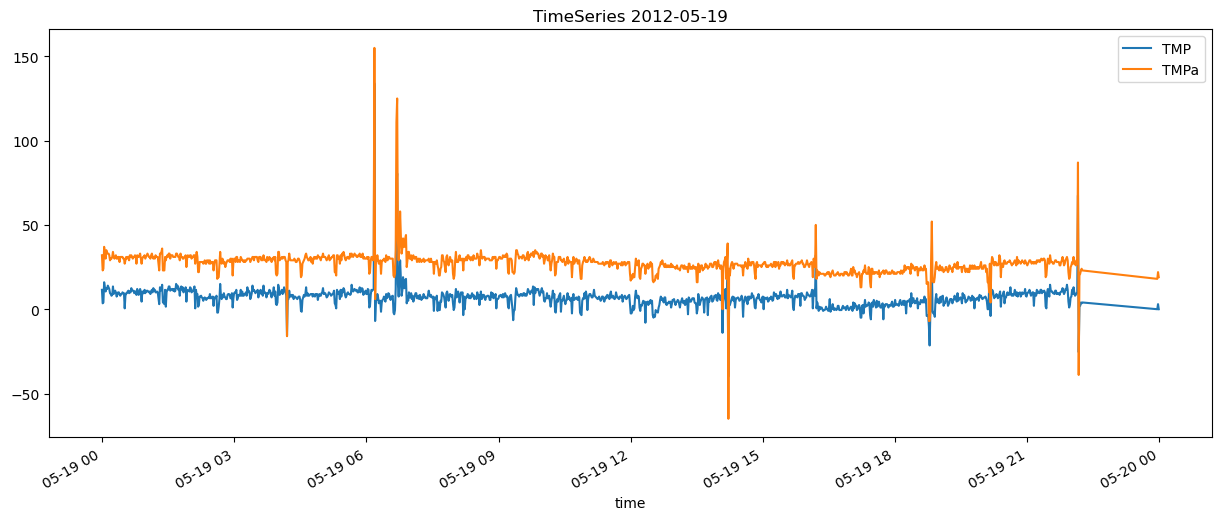

In [41]:
plot_ts_day('2012-05-19', return_df=False)

### Plot a bigger interval of observations 

In [44]:
def plot_ts_interval(start, end, return_df=True):
    '''The function plots the observations of a single day 
    Parameters
    ----------
    start : str
        The initial day of interest i.e., '2012-05-12'
    end : str
        The last day of interest i.e., '2012-05-13'
        To avoid conflicts this value must be grather than start
            
    Returns
    -------
    matplotlib.axes
        With observation of the specific day
    
    if return_df=True
    pd.DataFrame 
        With the values of the specific day
        Columns are 'TMP','TMPa'
        All are numeric
    '''
    df_day = df_time.loc[start:end]
    fig, ax = plt.subplots(figsize=(15, 6))
    df_day.plot(xlabel="time", title=f"TimeSeries from {start} to {end}", ax=ax);
    if return_df:
        return df_day 

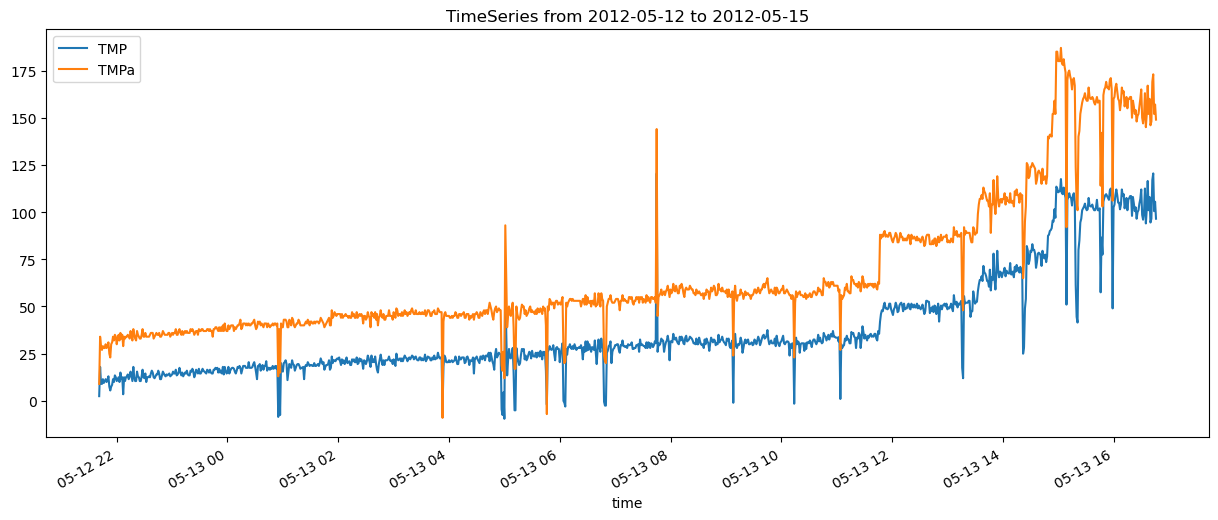

In [45]:
plot_ts_interval('2012-05-12', '2012-05-15', return_df=False)

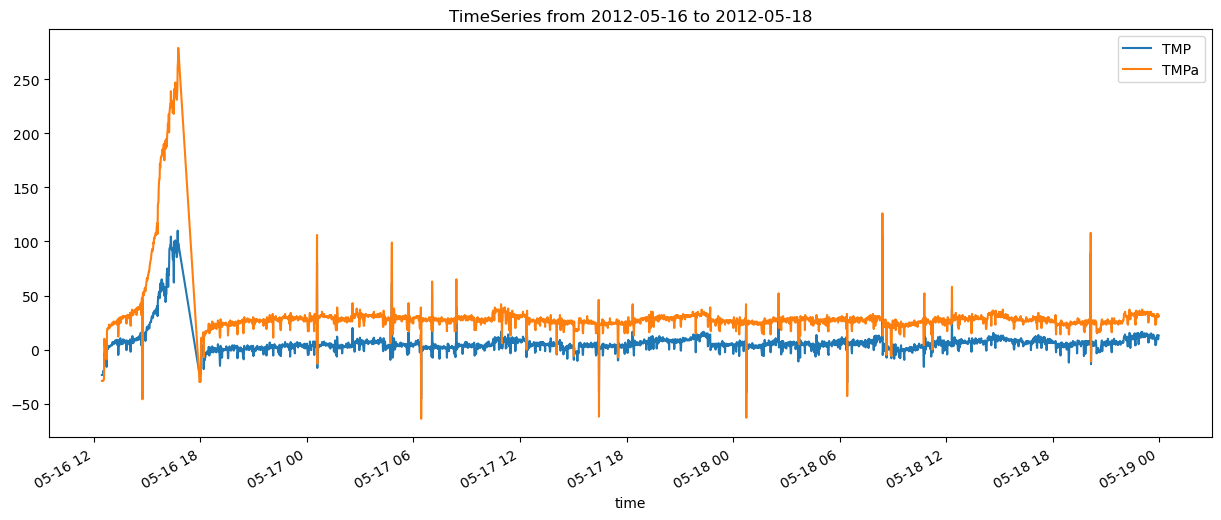

In [48]:
plot_ts_interval('2012-05-16', '2012-05-18', return_df=False)

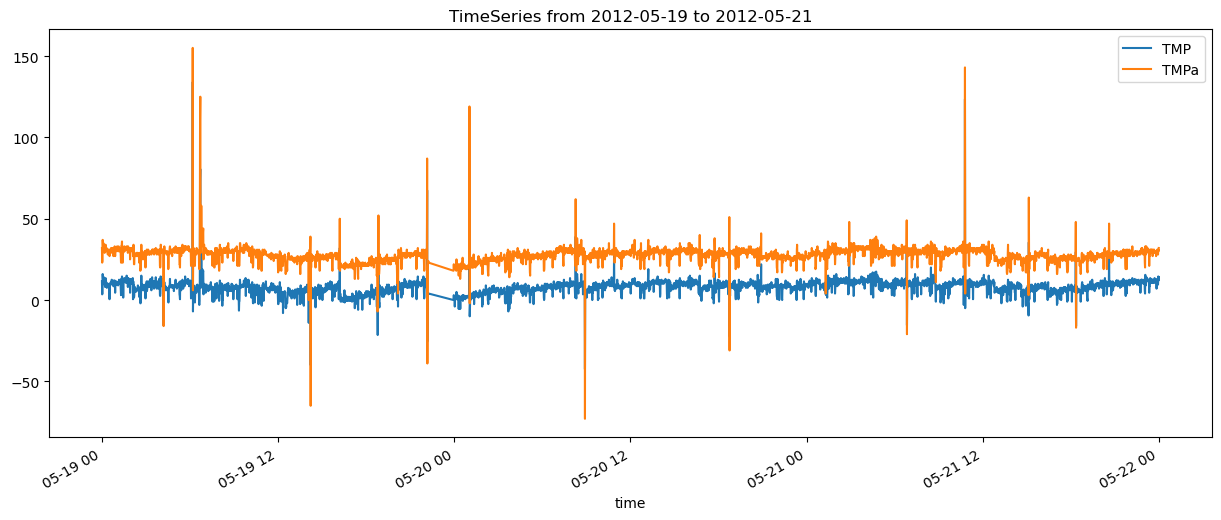

In [47]:
plot_ts_interval('2012-05-19', '2012-05-21', return_df=False)

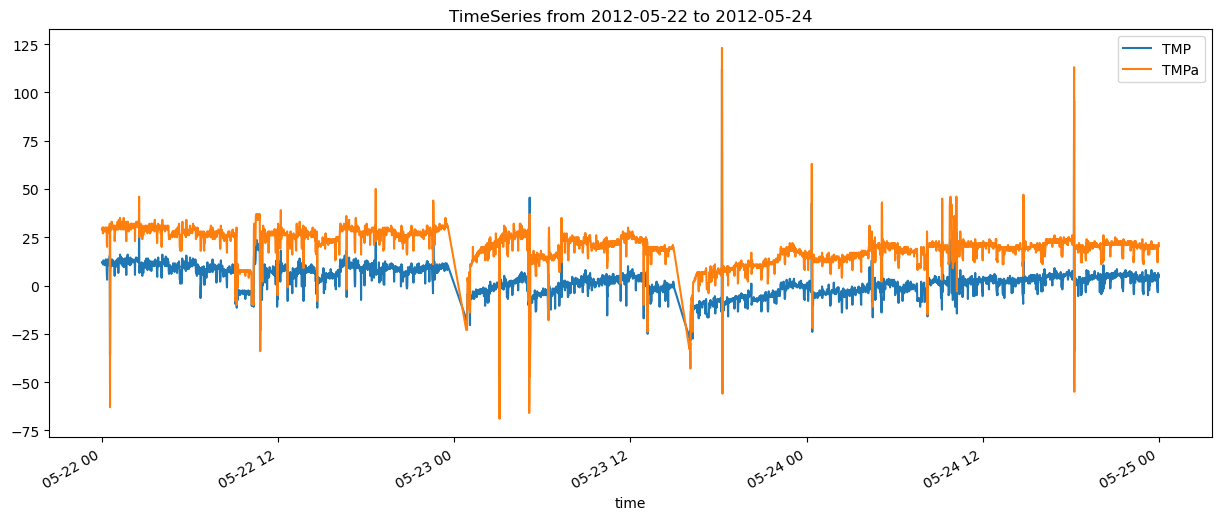

In [49]:
plot_ts_interval('2012-05-22', '2012-05-24', return_df=False)